In [59]:
# importação das bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import plotly.express as px
import plotly

%matplotlib inline

In [2]:
#importação da biblioteca para trazer os dados do site
from urllib.request import urlretrieve

In [3]:
# fazendo a importação dos dados e colocando nos seus respectivos csv's
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'

urlretrieve(url, 'global_cases.csv')

('global_cases.csv', <http.client.HTTPMessage at 0x23c410dbe50>)

In [4]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'

urlretrieve(url, 'global_deaths.csv')

('global_deaths.csv', <http.client.HTTPMessage at 0x23c4121a8e0>)

In [5]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv'

urlretrieve(url, 'global_recovered.csv')

('global_recovered.csv', <http.client.HTTPMessage at 0x23c4121adf0>)

In [6]:
url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/UID_ISO_FIPS_LookUp_Table.csv'
urlretrieve(url, 'global_population.csv')

('global_population.csv', <http.client.HTTPMessage at 0x23c41249040>)

In [7]:
# carregando os csv nos dataframes
recovered_df = pd.read_csv('global_recovered.csv', sep=',')
deaths_df = pd.read_csv('global_deaths.csv', sep=',')
confirmed_df = pd.read_csv('global_cases.csv', sep=',')
population_df = pd.read_csv('population_by_country_2020 (1).csv', sep=',')
population2_df = pd.read_csv('global_population.csv')

In [8]:
deaths_df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/8/21,2/9/21,2/10/21,2/11/21,2/12/21,2/13/21,2/14/21,2/15/21,2/16/21,2/17/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,...,2413,2414,2418,2419,2424,2427,2427,2427,2428,2428
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,1472,1488,1503,1517,1531,1543,1555,1567,1582,1600
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,2918,2924,2926,2930,2932,2935,2939,2943,2945,2947
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,106,106,106,106,106,107,107,107,107,107
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,475,478,487,487,490,491,492,493,494,496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,NaN,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
269,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,...,1888,1897,1909,1910,1918,1930,1933,1936,1942,1948
270,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,615,615,616,616,616,616,617,617,618,618
271,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,869,881,901,914,931,940,951,959,974,983


In [9]:
recovered_df.reset_index(inplace=True)

In [10]:
deaths_df = deaths_df.groupby('Country/Region').max()

In [11]:
deaths_df.reset_index(inplace=True)

In [12]:
confirmed_df = confirmed_df.groupby('Country/Region').max()

In [13]:
confirmed_df.reset_index(inplace=True)

In [14]:
df_popu = population_df.drop(['Net Change', 'Land Area (Km²)', 'Migrants (net)', 'Yearly Change', 
         'Fert. Rate', 'World Share' ], axis=1)

In [15]:
# transpondo todas as colunas de data para valores.
dates = confirmed_df.columns[4:]
confirmed_df_long = confirmed_df.melt(
    id_vars=['Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Confirmed'
)
deaths_df_long = deaths_df.melt(
    id_vars=['Country/Region', 'Lat', 'Long'], 
    value_vars=dates, 
    var_name='Date', 
    value_name='Deaths'
)
recovered_df_long = recovered_df.melt(
    id_vars=['Country/Region', 'Lat', 'Long'],
    value_vars=dates, 
    var_name='Date', 
    value_name='Recovered'
)

In [16]:
# removendo os dados recuperados do Canadá devido ao problema de incompatibilidade

recovered_df_long = recovered_df_long[recovered_df_long['Country/Region']!='Canada']

In [17]:
# Mesclando confirmed_df_long e deaths_df_long
full_table = confirmed_df_long.merge(
  right=deaths_df_long, 
  how='left',
  on=['Country/Region', 'Date', 'Lat', 'Long']
)
# Mesclando full_table e recovered_df_long
full_table = full_table.merge(
  right=recovered_df_long, 
  how='left',
  on=['Country/Region', 'Date', 'Lat', 'Long']
)

In [18]:
# Convertendo a coluna Date de string para o formato de Datetime
full_table['Date'] = pd.to_datetime(full_table['Date'])

In [19]:
# tratando da coluna Recovered retirando os NAN e colocando o valor 0
full_table['Recovered'] = full_table['Recovered'].fillna(0)

In [20]:
# adicionando a coluna Active Case = confirmed - deaths - recovered
full_table['Active'] = full_table['Confirmed'] - full_table['Deaths'] - full_table['Recovered']

In [21]:
# resetando o index
full_table.reset_index(inplace=True)

In [22]:
full_table.head()

,index,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,0,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0.0,0.0
1,1,Albania,41.15330,20.168300,2020-01-23,0,0,0.0,0.0
2,2,Algeria,28.03390,1.659600,2020-01-23,0,0,0.0,0.0
3,3,Andorra,42.50630,1.521800,2020-01-23,0,0,0.0,0.0
4,4,Angola,-11.20270,17.873900,2020-01-23,0,0,0.0,0.0


In [23]:
# retirando as colunas
#full_table.drop(['index','Lat', 'Long'], axis=1, inplace=True)
full_table.drop(['index'], axis=1, inplace=True)

In [24]:
full_table.columns

Index(['Country/Region', 'Lat', 'Long', 'Date', 'Confirmed', 'Deaths',
       'Recovered', 'Active'],
      dtype='object')

In [25]:
full_table.groupby('Country/Region').max()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
Country/Region,,,,,,,
Afghanistan,33.939110,67.709953,2021-02-17,55540,2428,48626.0,20311.0
Albania,41.153300,20.168300,2021-02-17,95726,1600,59684.0,34756.0
Algeria,28.033900,1.659600,2021-02-17,111247,2947,76489.0,31811.0
Andorra,42.506300,1.521800,2021-02-17,10583,107,10066.0,1309.0
Angola,-11.202700,17.873900,2021-02-17,20400,496,18951.0,7000.0
...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,2021-02-17,2329,35,1574.0,720.0
West Bank and Gaza,31.952200,35.233200,2021-02-17,170527,1948,158709.0,25254.0
Yemen,15.552727,48.516388,2021-02-17,2151,618,1431.0,580.0


In [26]:
# adicionando a coluna de mês
full_table['month_year'] = pd.to_datetime(full_table['Date']).dt.to_period('M')

In [27]:
full_table.head()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,month_year
0,Afghanistan,33.93911,67.709953,2020-01-23,0,0,0.0,0.0,2020-01
1,Albania,41.15330,20.168300,2020-01-23,0,0,0.0,0.0,2020-01
2,Algeria,28.03390,1.659600,2020-01-23,0,0,0.0,0.0,2020-01
3,Andorra,42.50630,1.521800,2020-01-23,0,0,0.0,0.0,2020-01
4,Angola,-11.20270,17.873900,2020-01-23,0,0,0.0,0.0,2020-01


In [28]:
full_table.to_csv('arquivos_tratados.csv', index=False)

In [29]:
population_df = df_popu.rename(columns={'Country (or dependency)': 'Country/Region'})

In [30]:
full_table = full_table.merge(
  right=population_df, 
  how='left',
  on=['Country/Region']
)

In [31]:
full_table

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,month_year,Population (2020),Density (P/Km²),Med. Age,Urban Pop %
0,Afghanistan,33.939110,67.709953,2020-01-23,0,0,0.0,0.0,2020-01,39074280.0,60.0,18,25 %
1,Albania,41.153300,20.168300,2020-01-23,0,0,0.0,0.0,2020-01,2877239.0,105.0,36,63 %
2,Algeria,28.033900,1.659600,2020-01-23,0,0,0.0,0.0,2020-01,43984569.0,18.0,29,73 %
3,Andorra,42.506300,1.521800,2020-01-23,0,0,0.0,0.0,2020-01,77287.0,164.0,N.A.,88 %
4,Angola,-11.202700,17.873900,2020-01-23,0,0,0.0,0.0,2020-01,33032075.0,26.0,17,67 %
...,...,...,...,...,...,...,...,...,...,...,...,...,...
75259,Vietnam,14.058324,108.277199,2021-02-17,2329,35,1574.0,720.0,2021-02,97490013.0,314.0,32,38 %
75260,West Bank and Gaza,31.952200,35.233200,2021-02-17,170527,1948,158709.0,9870.0,2021-02,NaN,NaN,NaN,NaN
75261,Yemen,15.552727,48.516388,2021-02-17,2151,618,1431.0,102.0,2021-02,29935468.0,56.0,20,38 %
75262,Zambia,-13.133897,27.849332,2021-02-17,71677,983,64040.0,6654.0,2021-02,18468257.0,25.0,18,45 %


In [32]:
df_agrupado = full_table.groupby(['Country/Region']).max()

In [33]:
df_agrupado

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,month_year,Population (2020),Density (P/Km²),Med. Age,Urban Pop %
Country/Region,,,,,,,,,,,,
Afghanistan,33.939110,67.709953,2021-02-17,55540,2428,48626.0,20311.0,2021-02,39074280.0,60.0,18,25 %
Albania,41.153300,20.168300,2021-02-17,95726,1600,59684.0,34756.0,2021-02,2877239.0,105.0,36,63 %
Algeria,28.033900,1.659600,2021-02-17,111247,2947,76489.0,31811.0,2021-02,43984569.0,18.0,29,73 %
Andorra,42.506300,1.521800,2021-02-17,10583,107,10066.0,1309.0,2021-02,77287.0,164.0,N.A.,88 %
Angola,-11.202700,17.873900,2021-02-17,20400,496,18951.0,7000.0,2021-02,33032075.0,26.0,17,67 %
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,14.058324,108.277199,2021-02-17,2329,35,1574.0,720.0,2021-02,97490013.0,314.0,32,38 %
West Bank and Gaza,31.952200,35.233200,2021-02-17,170527,1948,158709.0,25254.0,2021-02,NaN,NaN,NaN,NaN
Yemen,15.552727,48.516388,2021-02-17,2151,618,1431.0,580.0,2021-02,29935468.0,56.0,20,38 %


In [34]:
df11 = full_table[full_table['Country/Region'] == 'Brazil'].max()
df11

Country/Region                    Brazil
Lat                              -14.235
Long                            -51.9253
Date                 2021-02-17 00:00:00
Confirmed                        9978747
Deaths                            242090
Recovered                     8.9334e+06
Active                            857627
month_year                       2021-02
Population (2020)            2.12822e+08
Density (P/Km²)                       25
Med. Age                              33
Urban Pop %                         88 %
dtype: object

In [35]:
full_table[full_table['Country/Region'] == 'Brazil'][-1:]

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,month_year,Population (2020),Density (P/Km²),Med. Age,Urban Pop %
75095,Brazil,-14.235,-51.9253,2021-02-17,9978747,242090,8933402.0,803255.0,2021-02,212821986.0,25.0,33,88 %


In [36]:
df_country = full_table.groupby(full_table['Country/Region'])

In [37]:
df_country

In [38]:
df_country1 = full_table.groupby('Country/Region').sum()

In [39]:
df_country1.head()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Population (2020),Density (P/Km²)
Country/Region,,,,,,,,
Afghanistan,13304.13112,26542.301576,11094723,410233,8220895.0,2463595.0,1.531712e+10,23520.0
Albania,16132.09360,7905.973600,7302585,153165,4154923.0,2994497.0,1.127878e+09,41160.0
Algeria,10989.28880,650.563200,15657345,515207,10600083.0,4542055.0,1.724195e+10,7056.0
Andorra,16662.46960,596.545600,1137272,20086,971015.0,146171.0,3.029650e+07,64288.0
Angola,-4391.45840,7006.568800,2266444,58483,1438898.0,769063.0,1.294857e+10,10192.0


In [40]:
df_country1.loc['Brazil']

Lat                 -5.580120e+03
Long                -2.035472e+04
Confirmed            1.315405e+09
Deaths               3.752909e+07
Recovered            1.131623e+09
Active               1.462524e+08
Population (2020)    8.342622e+10
Density (P/Km²)      9.800000e+03
Name: Brazil, dtype: float64

In [41]:
df_country1.loc['Vietnam']

Lat                  5.510863e+03
Long                 4.244466e+04
Confirmed            3.028140e+05
Deaths               6.588000e+03
Recovered            2.501440e+05
Active               4.608200e+04
Population (2020)    3.821609e+10
Density (P/Km²)      1.230880e+05
Name: Vietnam, dtype: float64

In [42]:
df_country1.loc['Yemen']

Lat                  6.096669e+03
Long                 1.901842e+04
Confirmed            4.840010e+05
Deaths               1.383970e+05
Recovered            2.887220e+05
Active               5.688200e+04
Population (2020)    1.173470e+10
Density (P/Km²)      2.195200e+04
Name: Yemen, dtype: float64

In [43]:
df_bra = full_table[full_table['Country/Region'] == 'Brazil']

In [44]:
df_bra.max()

Country/Region                    Brazil
Lat                              -14.235
Long                            -51.9253
Date                 2021-02-17 00:00:00
Confirmed                        9978747
Deaths                            242090
Recovered                     8.9334e+06
Active                            857627
month_year                       2021-02
Population (2020)            2.12822e+08
Density (P/Km²)                       25
Med. Age                              33
Urban Pop %                         88 %
dtype: object

In [45]:
df_bra.groupby(['month_year']).max()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Population (2020),Density (P/Km²),Med. Age,Urban Pop %
month_year,,,,,,,,,,,,
2020-01,Brazil,-14.235,-51.9253,2020-01-31,0,0,0.0,0.0,212821986.0,25.0,33,88 %
2020-02,Brazil,-14.235,-51.9253,2020-02-29,2,0,0.0,2.0,212821986.0,25.0,33,88 %
2020-03,Brazil,-14.235,-51.9253,2020-03-31,5717,201,127.0,5389.0,212821986.0,25.0,33,88 %
2020-04,Brazil,-14.235,-51.9253,2020-04-30,87187,6006,35935.0,45246.0,212821986.0,25.0,33,88 %
2020-05,Brazil,-14.235,-51.9253,2020-05-31,514849,29314,206555.0,278980.0,212821986.0,25.0,33,88 %
2020-06,Brazil,-14.235,-51.9253,2020-06-30,1402041,59594,788318.0,554129.0,212821986.0,25.0,33,88 %
2020-07,Brazil,-14.235,-51.9253,2020-07-31,2662485,92475,2008854.0,583080.0,212821986.0,25.0,33,88 %
2020-08,Brazil,-14.235,-51.9253,2020-08-31,3908272,121381,3268591.0,598313.0,212821986.0,25.0,33,88 %
2020-09,Brazil,-14.235,-51.9253,2020-09-30,4810935,143952,4274774.0,502021.0,212821986.0,25.0,33,88 %


In [46]:
df_bra.columns[2:6]

Index(['Long', 'Date', 'Confirmed', 'Deaths'], dtype='object')

Text(0, 0.5, 'Casos - Milhão')

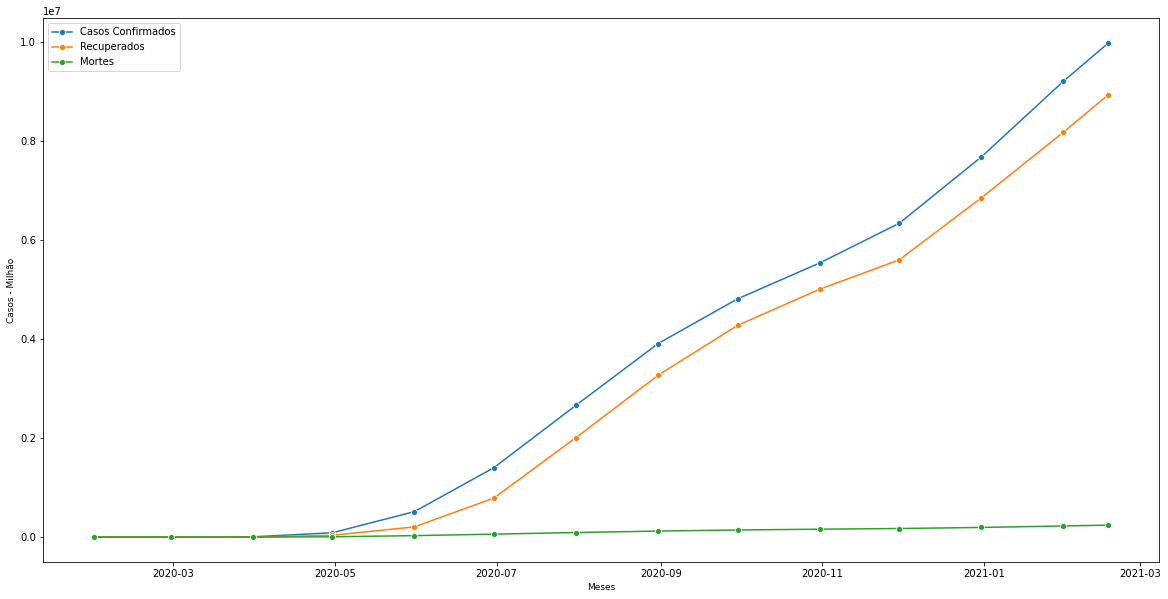

In [47]:
plt.figure(figsize=(20,10))

sns.lineplot(data=df_bra.groupby(['month_year']).max(), x='Date', y='Confirmed', label='Casos Confirmados', marker='o',)
sns.lineplot(data=df_bra.groupby(['month_year']).max(), x='Date', y='Recovered', label='Recuperados', marker='o')
sns.lineplot(data=df_bra.groupby(['month_year']).max(), x='Date', y='Deaths', label='Mortes', marker='o')

plt.xlabel('Meses', fontsize=9)
plt.ylabel('Casos - Milhão', fontsize=9)

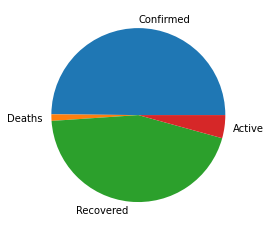

In [48]:
plt.pie(df_bra[['Confirmed', 'Deaths', 'Recovered', 'Active' ]].max(), labels=df_bra[['Confirmed', 'Deaths', 'Recovered', 'Active' ]].columns)
plt.show()

In [49]:
df_bra[['Confirmed', 'Deaths', 'Recovered', 'Active' ]].max()

Confirmed    9978747.0
Deaths        242090.0
Recovered    8933402.0
Active        857627.0
dtype: float64

<BarContainer object of 4 artists>

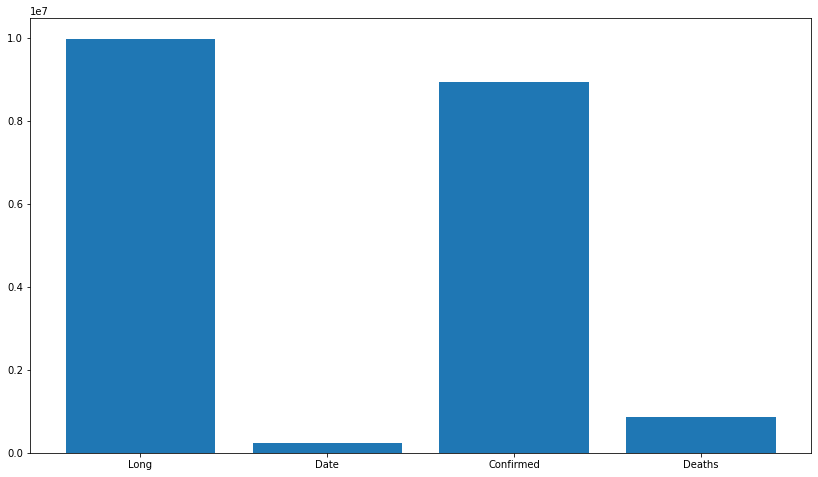

In [50]:
plt.figure(figsize=(14, 8))
plt.bar(df_bra.columns[2:6], df_bra[['Confirmed', 'Deaths', 'Recovered', 'Active' ]].max().values)

In [51]:
df_Afghanistan = full_table[full_table['Country/Region'] == 'Afghanistan']

In [52]:
df_Afghanistan.groupby(['month_year']).max()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Population (2020),Density (P/Km²),Med. Age,Urban Pop %
month_year,,,,,,,,,,,,
2020-01,Afghanistan,33.93911,67.709953,2020-01-31,0,0,0.0,0.0,39074280.0,60.0,18,25 %
2020-02,Afghanistan,33.93911,67.709953,2020-02-29,1,0,0.0,1.0,39074280.0,60.0,18,25 %
2020-03,Afghanistan,33.93911,67.709953,2020-03-31,175,4,5.0,166.0,39074280.0,60.0,18,25 %
2020-04,Afghanistan,33.93911,67.709953,2020-04-30,2127,64,260.0,1803.0,39074280.0,60.0,18,25 %
2020-05,Afghanistan,33.93911,67.709953,2020-05-31,15208,258,1328.0,13622.0,39074280.0,60.0,18,25 %
2020-06,Afghanistan,33.93911,67.709953,2020-06-30,31507,752,14131.0,20311.0,39074280.0,60.0,18,25 %
2020-07,Afghanistan,33.93911,67.709953,2020-07-31,36665,1284,25509.0,15395.0,39074280.0,60.0,18,25 %
2020-08,Afghanistan,33.93911,67.709953,2020-08-31,38159,1403,29089.0,9906.0,39074280.0,60.0,18,25 %
2020-09,Afghanistan,33.93911,67.709953,2020-09-30,39268,1460,32789.0,7555.0,39074280.0,60.0,18,25 %


In [53]:
tmp = full_table[full_table['Country/Region'] == 'Brazil']
tmp.index = tmp['Date']
tmp.resample('M').max()

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,month_year,Population (2020),Density (P/Km²),Med. Age,Urban Pop %
Date,,,,,,,,,,,,,
2020-01-31,Brazil,-14.235,-51.9253,2020-01-31,0,0,0.0,0.0,2020-01,212821986.0,25.0,33,88 %
2020-02-29,Brazil,-14.235,-51.9253,2020-02-29,2,0,0.0,2.0,2020-02,212821986.0,25.0,33,88 %
2020-03-31,Brazil,-14.235,-51.9253,2020-03-31,5717,201,127.0,5389.0,2020-03,212821986.0,25.0,33,88 %
2020-04-30,Brazil,-14.235,-51.9253,2020-04-30,87187,6006,35935.0,45246.0,2020-04,212821986.0,25.0,33,88 %
2020-05-31,Brazil,-14.235,-51.9253,2020-05-31,514849,29314,206555.0,278980.0,2020-05,212821986.0,25.0,33,88 %
2020-06-30,Brazil,-14.235,-51.9253,2020-06-30,1402041,59594,788318.0,554129.0,2020-06,212821986.0,25.0,33,88 %
2020-07-31,Brazil,-14.235,-51.9253,2020-07-31,2662485,92475,2008854.0,583080.0,2020-07,212821986.0,25.0,33,88 %
2020-08-31,Brazil,-14.235,-51.9253,2020-08-31,3908272,121381,3268591.0,598313.0,2020-08,212821986.0,25.0,33,88 %
2020-09-30,Brazil,-14.235,-51.9253,2020-09-30,4810935,143952,4274774.0,502021.0,2020-09,212821986.0,25.0,33,88 %


In [54]:
# Filtering by latest data
latest_data = full_table[full_table['Date'] == full_table['Date'].max()]

In [60]:
month_end = full_table[pd.to_datetime(full_table["Date"]).dt.is_month_end]
month_end.loc[:,'Month'] = pd.to_datetime(month_end['Date']).dt.to_period('M').astype(str)
month_end.loc[month_end['Country/Region'] == 'France', 'Lat'] =  48.8032
month_end.loc[month_end['Country/Region'] == 'France', 'Long'] =  2.3511
month_end.loc[month_end['Country/Region'] == 'France']

,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,month_year,Population (2020),Density (P/Km²),Med. Age,Urban Pop %,Month
1598,France,48.8032,2.3511,2020-01-31,5,0,0.0,5.0,2020-01,65298930.0,119.0,42,82 %,2020-01
7166,France,48.8032,2.3511,2020-02-29,100,2,0.0,98.0,2020-02,65298930.0,119.0,42,82 %,2020-02
13118,France,48.8032,2.3511,2020-03-31,51579,3517,0.0,48062.0,2020-03,65298930.0,119.0,42,82 %,2020-03
18878,France,48.8032,2.3511,2020-04-30,167326,24315,0.0,143011.0,2020-04,65298930.0,119.0,42,82 %,2020-04
24830,France,48.8032,2.3511,2020-05-31,187817,28751,0.0,159066.0,2020-05,65298930.0,119.0,42,82 %,2020-05
30590,France,48.8032,2.3511,2020-06-30,196554,29763,0.0,166791.0,2020-06,65298930.0,119.0,42,82 %,2020-06
36542,France,48.8032,2.3511,2020-07-31,215135,30150,0.0,184985.0,2020-07,65298930.0,119.0,42,82 %,2020-07
42494,France,48.8032,2.3511,2020-08-31,304349,30501,0.0,273848.0,2020-08,65298930.0,119.0,42,82 %,2020-08
48254,France,48.8032,2.3511,2020-09-30,578769,31761,0.0,547008.0,2020-09,65298930.0,119.0,42,82 %,2020-09
54206,France,48.8032,2.3511,2020-10-31,1374691,36495,0.0,1338196.0,2020-10,65298930.0,119.0,42,82 %,2020-10


In [63]:
month_end = full_table[pd.to_datetime(full_table["Date"]).dt.is_month_end]
month_end.loc[:,'Month'] = pd.to_datetime(month_end['Date']).dt.to_period('M').astype(str)
month_end.loc[month_end['Country/Region'] == 'France', 'Lat'] =  48.8032
month_end.loc[month_end['Country/Region'] == 'France', 'Long'] =  2.3511
# mudar as variáveis conforme necessário
plotted_var = 'Confirmed'

import plotly.express as px
#df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(month_end,
                     lon = 'Long',
                     lat = 'Lat',
                     #color="continent", # which column to use to set the color of markers
                     hover_name='Country/Region', # column added to hover information
                     animation_frame='Month',
                     size=plotted_var, # size of markers
                     projection="natural earth")

fig.show()

In [64]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_us_cities.csv')
df.head()

df['text'] = df['name'] + '<br>Population ' + (df['pop']/1e6).astype(str)+' million'
limits = [(0,2),(3,10),(11,20),(21,50),(50,3000)]
colors = ["royalblue","crimson","lightseagreen","orange","lightgrey"]
cities = []
scale = 5000

fig = go.Figure()

for i in range(len(limits)):
    lim = limits[i]
    df_sub = df[lim[0]:lim[1]]
    fig.add_trace(go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = dict(
            size = df_sub['pop']/scale,
            color = colors[i],
            line_color='rgb(40,40,40)',
            line_width=0.5,
            sizemode = 'area'
        ),
        name = '{0} - {1}'.format(lim[0],lim[1])))

fig.update_layout(
        title_text = '2014 US city populations<br>(Click legend to toggle traces)',
        showlegend = True,
        geo = dict(
            scope = 'usa',
            landcolor = 'rgb(217, 217, 217)',
        )
    )

fig.show()

In [65]:
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="natural earth")
fig.show()

In [66]:
full_table = full_table.drop(columns=['Lat', 'Long'])

In [67]:
# Filtering by latest data
latest_data = full_table[full_table['Date'] == full_table['Date'].max()]
latest_data.loc[:, 'Confirmed / 1M Pop'] = latest_data['Confirmed'] / (latest_data['Population (2020)']/1000000)
latest_data.loc[:, 'Deaths / 1M Pop'] = latest_data['Deaths'] / (latest_data['Population (2020)']/1000000)
latest_data.isna().sum()/latest_data.shape[0]*100

Country/Region        0.0000
Date                  0.0000
Confirmed             0.0000
Deaths                0.0000
Recovered             0.0000
Active                0.0000
month_year            0.0000
Population (2020)     7.8125
Density (P/Km²)       7.8125
Med. Age              7.8125
Urban Pop %           7.8125
Confirmed / 1M Pop    7.8125
Deaths / 1M Pop       7.8125
dtype: float64

In [68]:
# Preparando dados
latest_data = latest_data.dropna()
mask = latest_data['Med. Age'] == 'N.A.'
latest_data.drop(latest_data[mask].index, inplace=True)

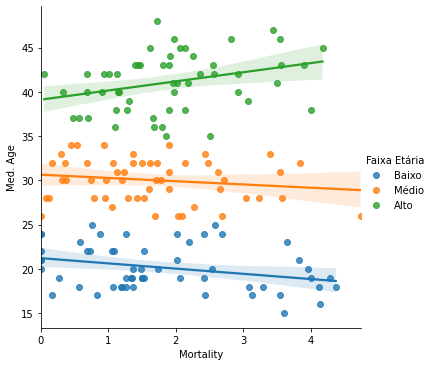

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Converting Med. Age to int
latest_data.loc[:,'Med. Age'] = latest_data['Med. Age'].apply(lambda x: int(x))
latest_data.loc[:,'Faixa Etária'] = pd.qcut(latest_data['Med. Age'], q=3, labels=['Baixo', 'Médio', 'Alto'])
latest_data.loc[:,'Mortality'] = latest_data['Deaths'] / latest_data['Confirmed'] * 100

Q1 = np.quantile(latest_data['Mortality'], 0.25)
Q3 = np.quantile(latest_data['Mortality'], 0.75)
IQR = Q3 - Q1
mort_sem_outliers = (latest_data['Mortality'] >= (Q1 - 1.5 * IQR)) & (latest_data['Mortality'] <= (Q3 + 1.5 * IQR))

sns.lmplot(data=latest_data[mort_sem_outliers], x='Mortality', y='Med. Age', hue='Faixa Etária')
plt.savefig('static/images/faixa_etaria.png')

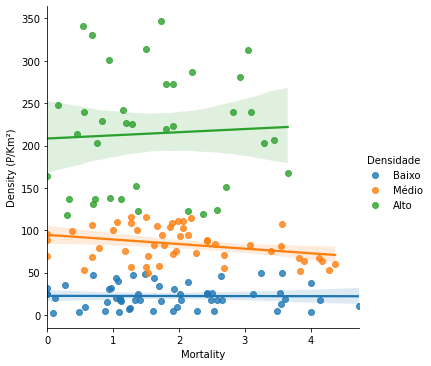

In [74]:
latest_data.loc[:,'Densidade'] = pd.qcut(latest_data['Density (P/Km²)'], q=3, labels=['Baixo', 'Médio', 'Alto'])

Q1 = np.quantile(latest_data['Density (P/Km²)'], 0.25)
Q3 = np.quantile(latest_data['Density (P/Km²)'], 0.75)
IQR = Q3 - Q1
dens_sem_outliers = (latest_data['Density (P/Km²)'] >= (Q1 - 1.5 * IQR)) & (latest_data['Density (P/Km²)'] <= (Q3 + 1.5 * IQR))

sns.lmplot(data=latest_data[mort_sem_outliers & dens_sem_outliers], x='Mortality', y='Density (P/Km²)', hue='Densidade')
plt.savefig('static/images/densidade.png')

In [71]:
print('Top 10 - Mortality Rate - Latest Update')
latest_data.loc[latest_data['Mortality'].sort_values(ascending=False).head(10).index, ['Country/Region', 'Mortality']]

#latest_data.drop(latest_data[mask].index, inplace=True)

Top 10 - Mortality Rate - Latest Update


,Country/Region,Mortality
75261,Yemen,28.730823
75186,Mexico,8.793417
75108,China,6.620593
75240,Syria,6.579561
75236,Sudan,6.197221
75125,Egypt,5.777649
75124,Ecuador,5.739340
75092,Bolivia,4.739303
75072,Afghanistan,4.371624
75171,Liberia,4.282116


In [ ]:
print('Top 10 - Confirmed Cases / 1M Population - Latest Update')
latest_data.loc[latest_data['Confirmed / 1M Pop'].sort_values(ascending=False).head(10).index, ['Country/Region', 'Confirmed / 1M Pop']].reset_index(drop=True)

In [ ]:
latest_data.loc[latest_data['Deaths / 1M Pop'].sort_values(ascending=False).head(10).index][['Date','Country/Region','Deaths / 1M Pop']].reset_index(drop=True)

In [72]:
import datetime as dt

str_date = '2020-06-01'
start_date = dt.datetime.strptime(str_date, '%Y-%m-%d')
print(start_date)

2020-06-01 00:00:00


In [ ]:
full_table[(full_table['Country/Region'] == 'Brazil') & (full_table['Date'] >= start_date)]

In [ ]:
latest_data['Country/Region'].value_counts()